## Introduction to KMeans Clustering:



*   KMeans is an unsupervised learning algorithm that groups data into a predefined number of clusters.
*   It works by assigning each data point to the nearest cluster center. The means of the data points within each cluster are then recalculated, and this process repeats until convergence.




#### Some Use Cases:

In marketing, KMeans helps in customer segmentation, categorizing customers into groups based on purchasing behavior, which can enhance targeted marketing strategies. In finance, it is employed to detect patterns and anomalies in spending or trading behavior, aiding in fraud detection and risk management. In the realm of bioinformatics, KMeans is utilized for gene expression data analysis, helping to identify groups of genes with similar expression patterns, which can be critical for understanding genetic diseases. Additionally, it's used in image segmentation in computer vision, where it helps in partitioning digital images into segments to simplify and/or change the representation of an image into something more meaningful and easier to analyze. Overall, KMeans is praised for its simplicity and efficiency in finding natural groupings in data without advanced domain knowledge.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

##  Generate Sample Data:



*   Before implementing KMeans, it's useful to have some data to work on.

*   Use make_blobs to generate synthetic data that is easy to cluster.

*   make_blobs is a function provided by the sklearn.datasets module in the Scikit-learn library, which is widely used in machine learning. This function generates isotropic Gaussian blobs for clustering.



Data shape: (500, 2)
Number of clusters: 3


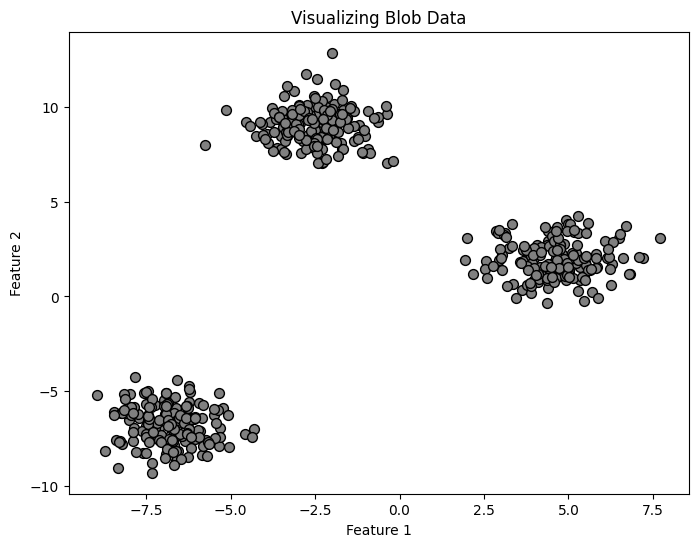

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(centers= 3 , n_samples= 500 , n_features= 2, shuffle= True , random_state= 42)


print("Data shape:", X.shape)

print("Number of clusters:", len(np.unique(y)))


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='grey', marker='o', edgecolor='k', s=50)
plt.title('Visualizing Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


The core of the KMeans algorithm is calculating the distance between points (usually Euclidean distance).

In [317]:
def euclidean_distance(x1, x2):
    return np.linalg.norm((x1 - x2))

### Initialize Centroids:


Initially, KMeans requires selecting random points as cluster centers (centroids).

Centroids are the central points of each cluster, which the KMeans algorithm seeks to optimally place. In the context of KMeans, a centroid is essentially the mean of all points belonging to a cluster. Initially, these centroids are selected by some strategy before the iterative process of assigning points and updating centroids begins.

The simplest and most common method is to randomly select K distinct data points from the dataset to serve as the initial centroids.

hint : (**use np.random.choice**) to select K random indices

In [318]:
def initialize_centroids(X, K):
    ### add your code here
    idx = np.random.choice(X.shape[0], K, replace = False)
    centroids = X[idx]
    return centroids

centroids = initialize_centroids(X, K=3)
centroids

array([[-3.57150134,  9.48787856],
       [-2.62484591,  8.71318243],
       [ 6.32702047,  2.85480944]])

###  Create Clusters :

Once initial centroids are set, the algorithm proceeds to assign each data point to the nearest centroid, based on the chosen distance metric, typically Euclidean distance. This assignment step forms the clusters for one iteration of the algorithm.

The create_clusters function is responsible for grouping all the data points into clusters based on which centroid is closest to each point. This is a central step in each iteration of the KMeans algorithm.

 How It Works:



1. Initialization of Clusters:
    * The function starts by initializing an empty list for each cluster. These lists will hold the indices of the data points that belong to each respective cluster.

2. Assignment of Points to Clusters:
    * It iterates over each data point in the dataset, and for each point, it determines the closest centroid. This decision is made using the _closest_centroid function, which calculates and compares the distances from the current data point to each centroid.   

3. Update Cluster Memberships:
    * Once the closest centroid is identified for a data point, the index of that data point is added to the corresponding cluster.




The _closest_centroid function calculates the Euclidean distance from a single data point to each centroid and returns the index of the centroid that is closest to that point.


1. Calculate Distances:
    * Compute the Euclidean distance between the data point and each centroid in the list of centroids.

2. Determine the Closest Centroid:
    * Identify which centroid has the smallest distance to the data point, which indicates it is the closest.

**Note that** : clusters is a list of list, and each cluster contains the indices of the points belonging to it.

hint : you can use **np.argmin** to get the indices with the minimum distances

In [319]:
def _closest_centroid(sample, centroids):
    ### add your code here
    distance = []
    # current_centroids =
    for idx in range(centroids.shape[0]):

        dist = euclidean_distance(sample, centroids[idx])

        distance.append(dist)

    closest_index = np.argmin(distance)

    return closest_index

_closest_centroid(X[50], centroids)

1

In [320]:
def _create_clusters(X, centroids, K):
    # Initialize an empty list for each cluster
    clusters = [[] for _ in range(K)]
    for idx, sample in enumerate(X):
        # Get the index of the closest centroid
        closest_index = _closest_centroid(sample, centroids)
        # Assign the sample index to the appropriate cluster

        clusters[closest_index].append(idx)

    return clusters

### Cluster Labels:

After forming the clusters, it's necessary to convert the cluster memberships into a simple list of labels that indicate the cluster each data point belongs to.


In [321]:
def _get_cluster_labels(clusters, X):
    n_samples = X.shape[0]
    # Create an array to hold the label for each sample
    labels = np.empty(n_samples)
    # Assign each sample the label of the cluster it was assigned to
    for cluster_idx, cluster in enumerate(clusters):
        ### complete the for loop
        for idx  in cluster :
          labels[idx] = cluster_idx

    return labels


In [326]:
clusters = _create_clusters(X, centroids, K=3)
_get_cluster_labels(clusters, X)

array([2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 1., 2., 2., 0.,
       1., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 1., 0.,
       2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1.,
       0., 1., 2., 2., 0., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 2., 2.,
       1., 2., 2., 2., 2., 2., 0., 1., 1., 2., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 0., 0., 0., 2., 2., 1.,
       1., 1., 2., 1., 0., 1., 0., 1., 1., 1., 1., 2., 1., 2., 0., 1., 2.,
       1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
       2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 0., 1., 1., 2., 1., 2.,
       2., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 0., 2., 1., 1.,
       2., 1., 1., 1., 2., 0., 0., 2., 2., 2., 0., 1., 1., 1., 2., 1., 1.,
       2., 1., 2., 1., 1., 2., 1., 0., 2., 1., 1., 1., 2., 0., 1., 1., 1.,
       2., 2., 2., 0., 1., 1., 2., 2., 2., 0., 1., 1., 1., 2., 1., 2., 2.,
       0., 1., 0., 2., 1.

### Get/ Update Centroids:

The goal of updating the centroids is to reposition each centroid to the geometric center (mean) of all the points assigned to its corresponding cluster. This recalibration is based on the current distribution of points within each cluster and is essential for refining the clustering process towards convergence.

How It Works:


1. Calculate the Mean of Cluster Points:
    * For each cluster, the function calculates the mean (average) position of all points assigned to that cluster. This mean becomes the new position of the centroid.

2. Apply Across All Centroids:
    * The process is repeated for each cluster’s centroid, ensuring that all centroids are optimally positioned at the center of their respective clusters for the next iteration of the algorithm.

In [327]:
def _get_centroids(X, clusters):
    n_features = X.shape[1]
    # Initialize the centroids array
    centroids = np.zeros((len(clusters), n_features))
    for cluster_idx, cluster in enumerate(clusters):
        # Ensure the cluster is not empty
        if len(cluster) > 0:
            # Calculate the mean for the cluster
            mean_cluster = np.mean(X[cluster], axis = 0)
            # Assign the new centroid

            centroids[cluster_idx] = mean_cluster
        # Handling empty clusters if necessary
        else:
            # Assign a random data point as a new centroid
            centroids[cluster_idx] = X[np.random.choice(len(X))]
    return centroids
_get_centroids(X, clusters)

array([[-3.29656349,  9.77626008],
       [-4.62192525,  1.40690047],
       [ 1.89692468, -0.47001309]])

### Checking Convergence Function:

The convergence of the algorithm is checked by the is_converged function. The function compares the positions of the old centroids (before the update) and the new centroids (after the update). If the positions of all centroids remain unchanged (i.e., the total sum of the distances between corresponding old and new centroids is zero), the algorithm has converged, indicating that further iterations will not result in any changes to the clusters.

In [351]:
def _is_converged(centroids_old, centroids_new):
    ### add your code here

    distances = np.zeros(centroids_new.shape[0])

    for idx in range(distances.shape[0]):

      distances[idx] = euclidean_distance(centroids_old[idx], centroids_new[idx])

    return np.sum(distances) == 0

### Plot Function:

The plot_clusters function is used to visualize the state of the clusters and centroids at each step of the algorithm. This function helps in understanding how centroids move and how clusters change with each iteration.

In [352]:
def plot_clusters(X, clusters, centroids):

    plt.figure(figsize=(8, 6))

    # More colors can be added if needed

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for cluster_idx, cluster in enumerate(clusters):
        cluster_points = X[cluster]
        centroid = centroids[cluster_idx]
        color = colors[cluster_idx % len(colors)]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=color, label=f'Cluster {cluster_idx + 1}')
        # Mark centroid
        plt.scatter(centroid[0], centroid[1], s=300, color=color, marker='x', linewidths=3)

    plt.title("Clusters and Centroids")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

### KMeans Algorithm (Put it all together):

In [353]:
def kmeans(X, K, max_iters, plot_steps=False):
    centroids = initialize_centroids(X, K)
    for _ in range(max_iters):
        clusters = _create_clusters(X, centroids, K)
        if plot_steps:
            plot_clusters(X, clusters, centroids)
        centroids_old = centroids
        centroids = _get_centroids(X, clusters)
        if _is_converged(centroids_old, centroids):
            break
        if plot_steps:
            plot_clusters(X, clusters, centroids)
    return _get_cluster_labels(clusters, X)


### Running KMeans:

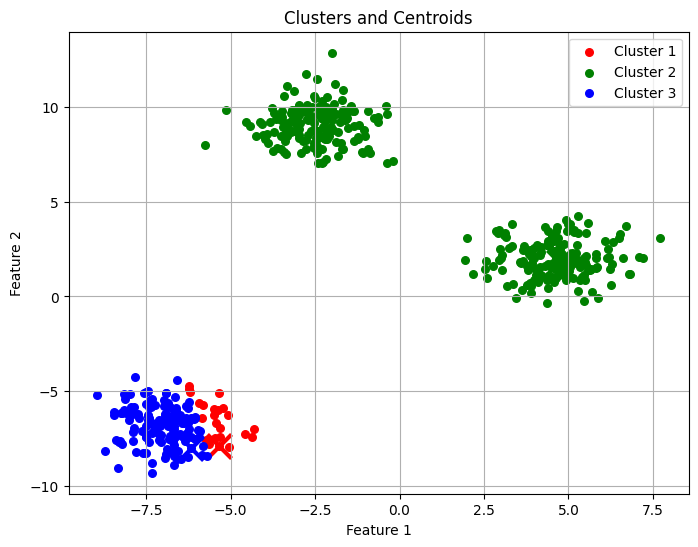

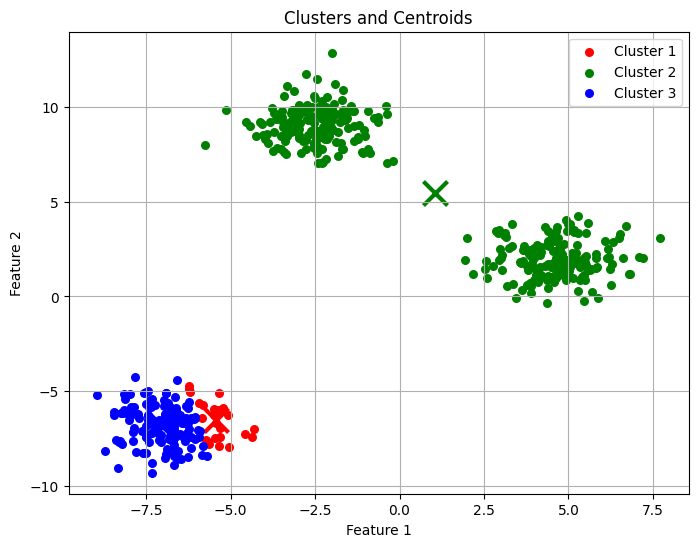

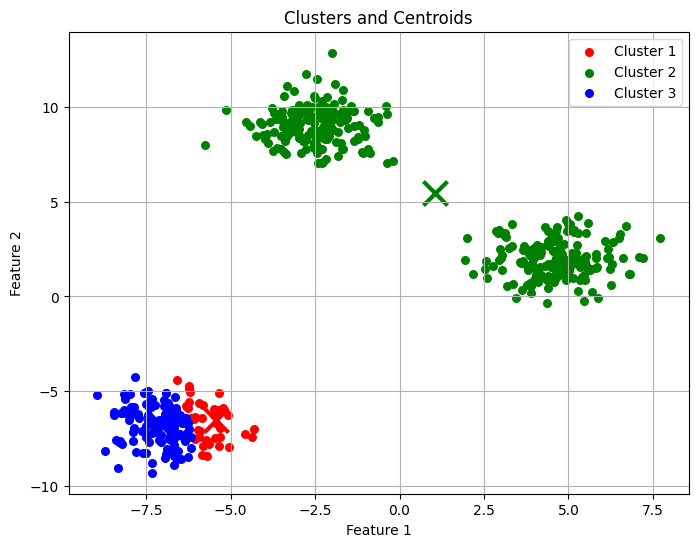

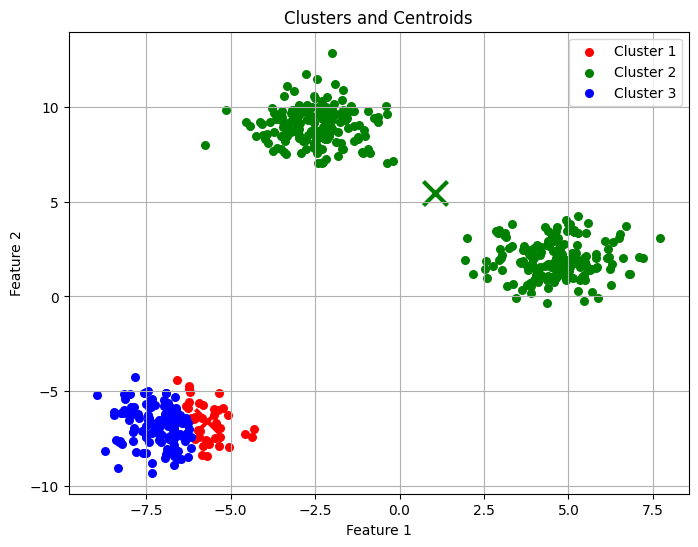

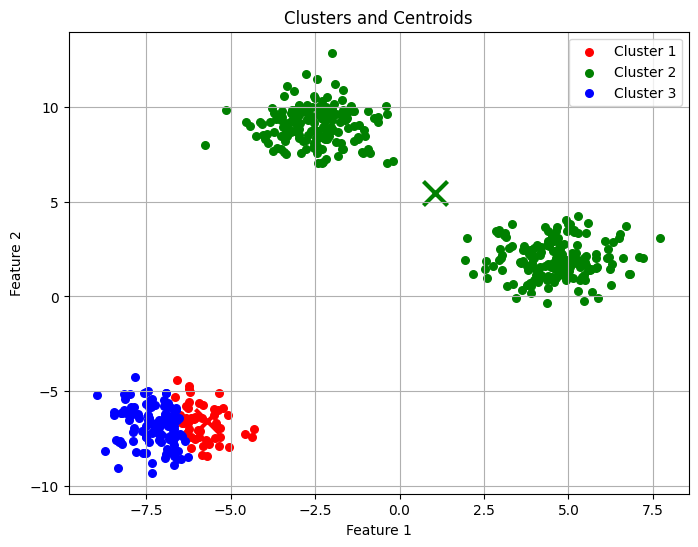

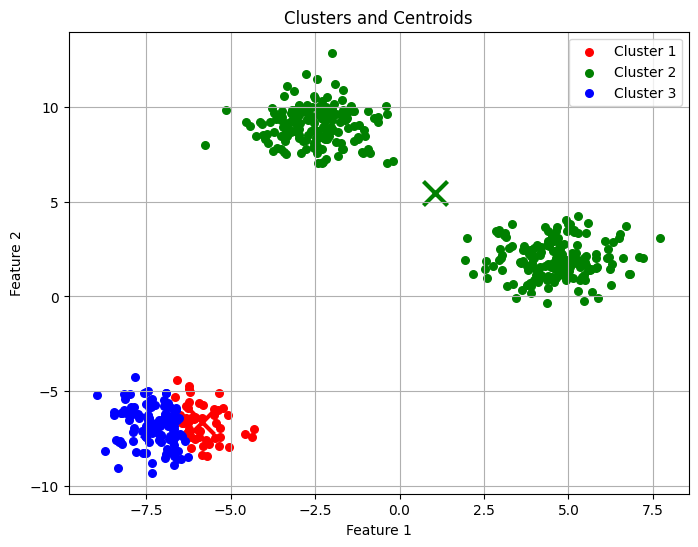

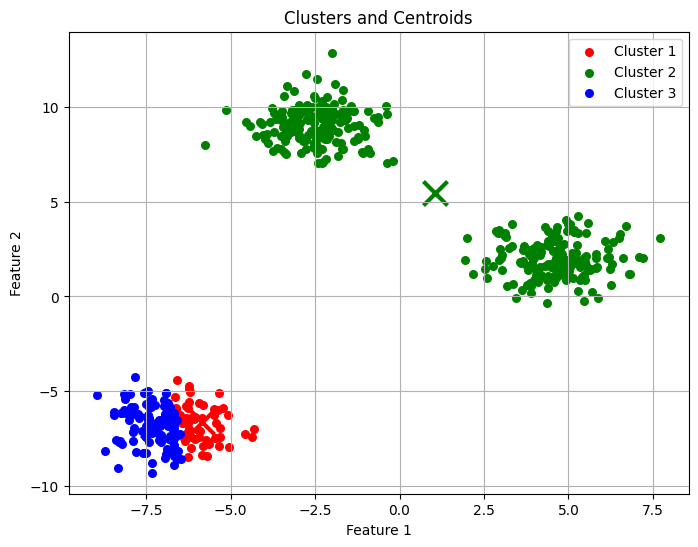

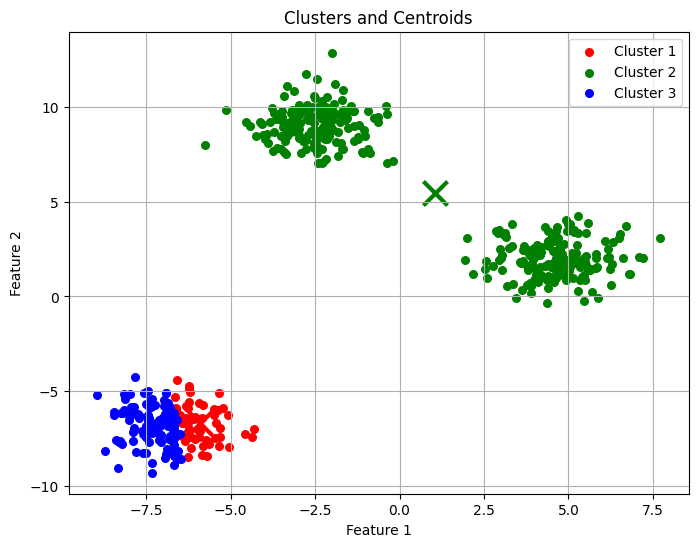

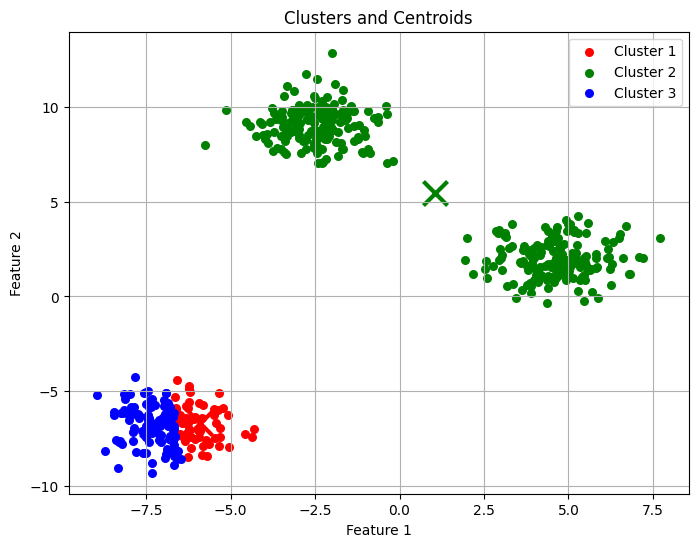

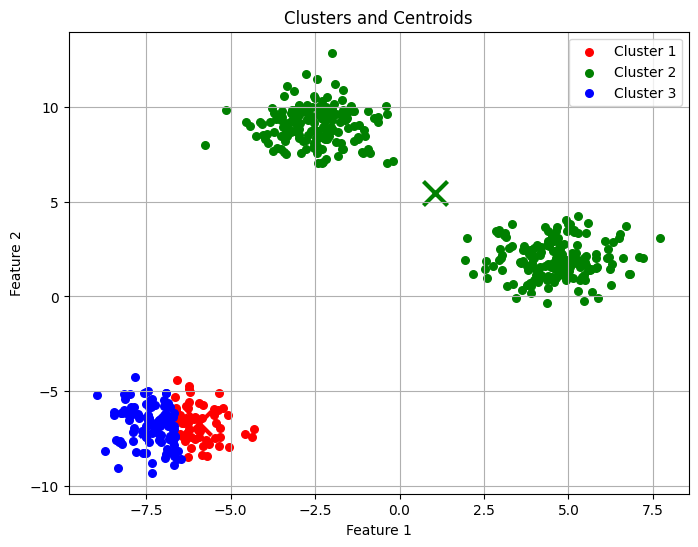

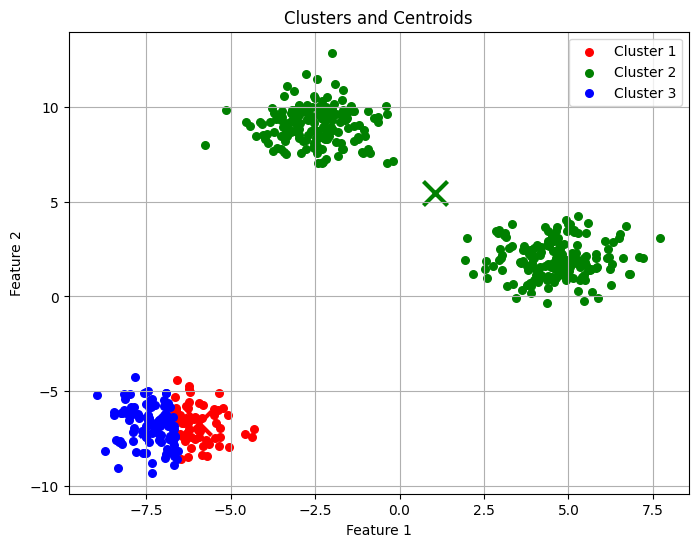

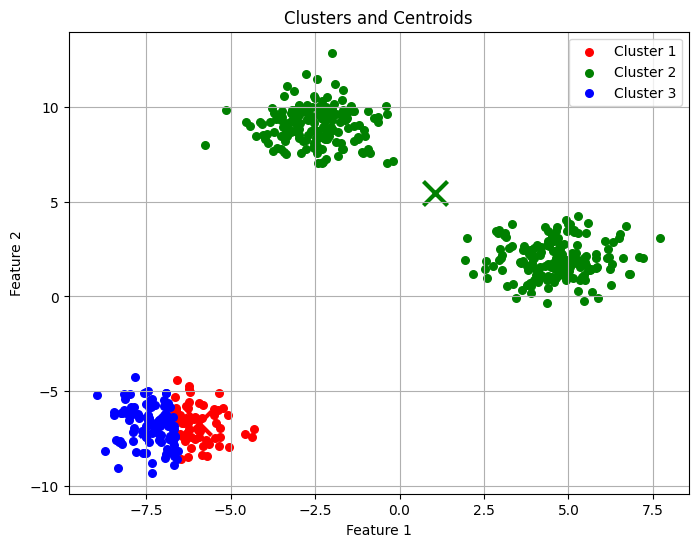

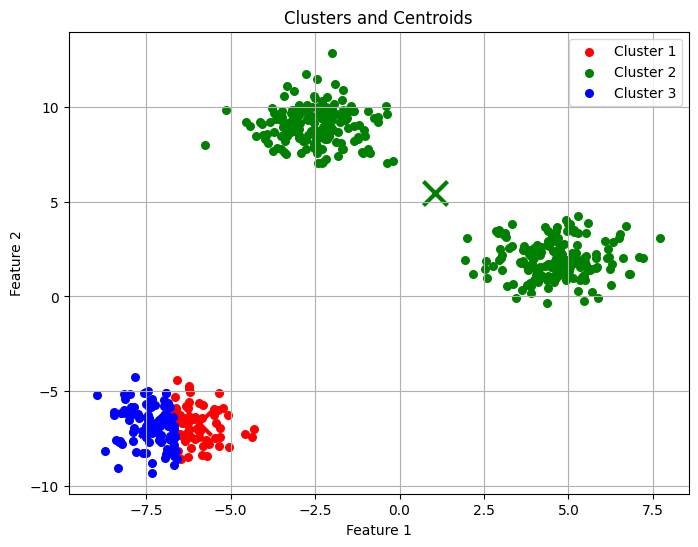

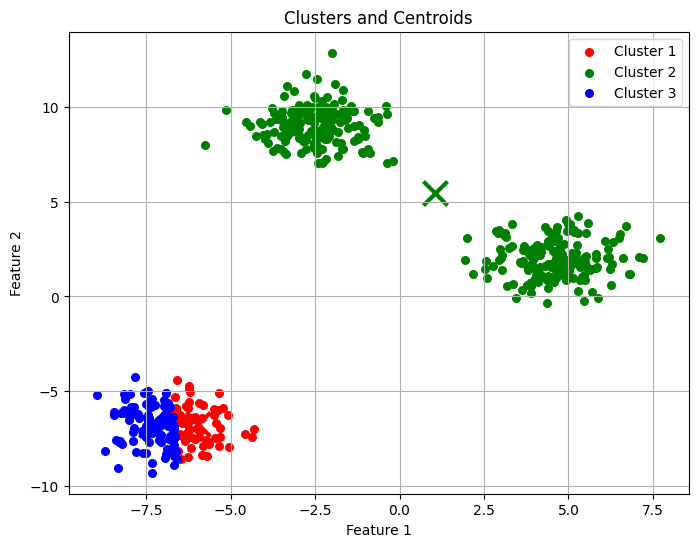

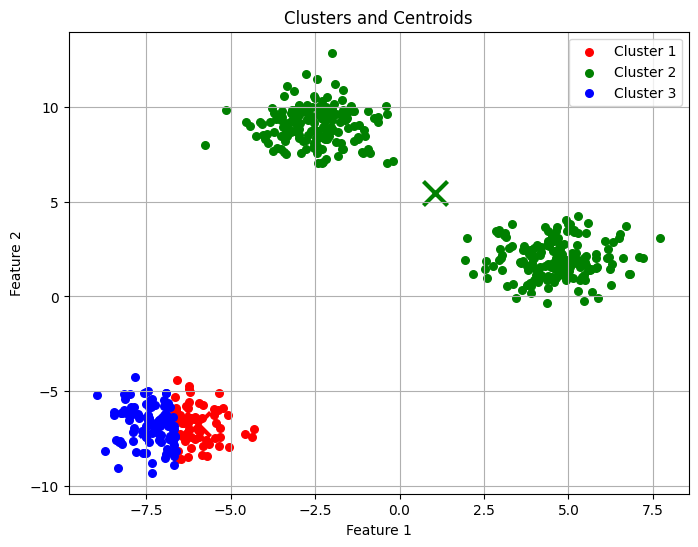

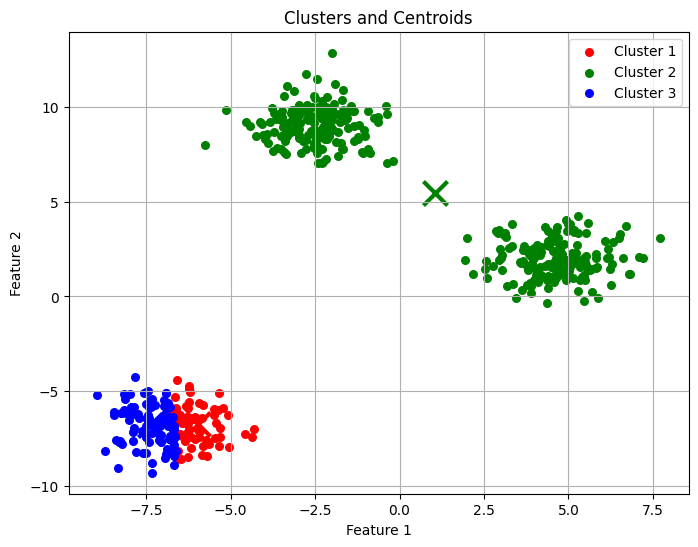

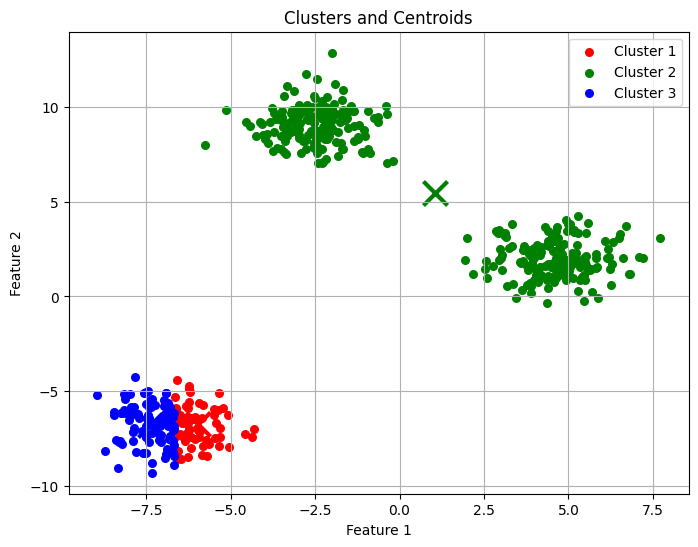

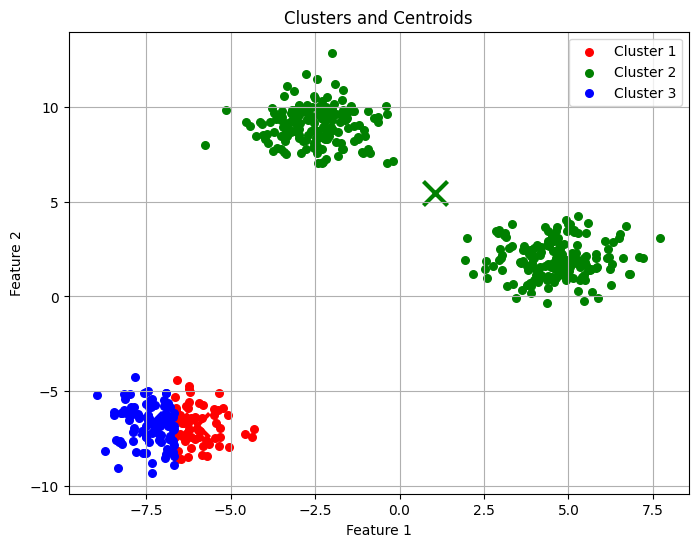

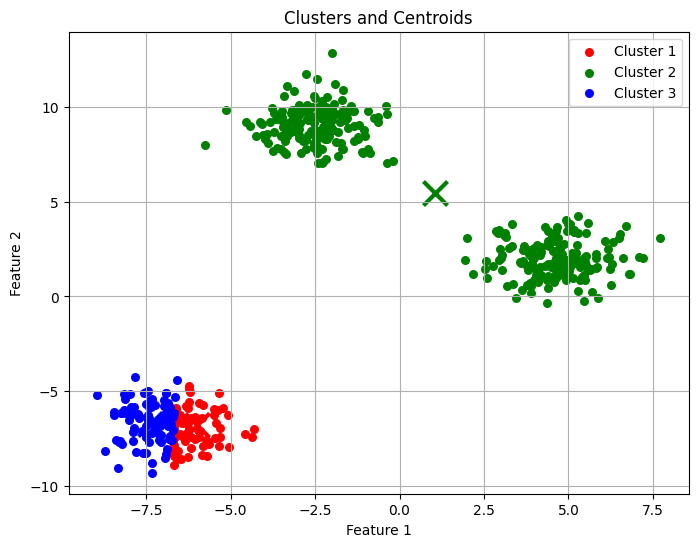

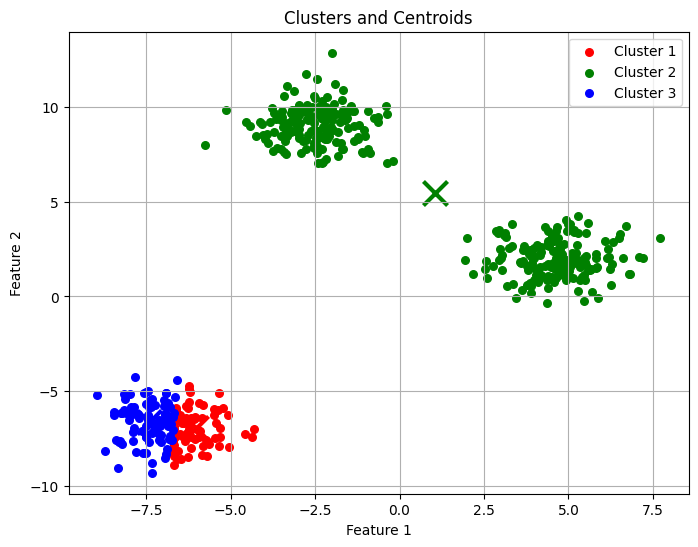

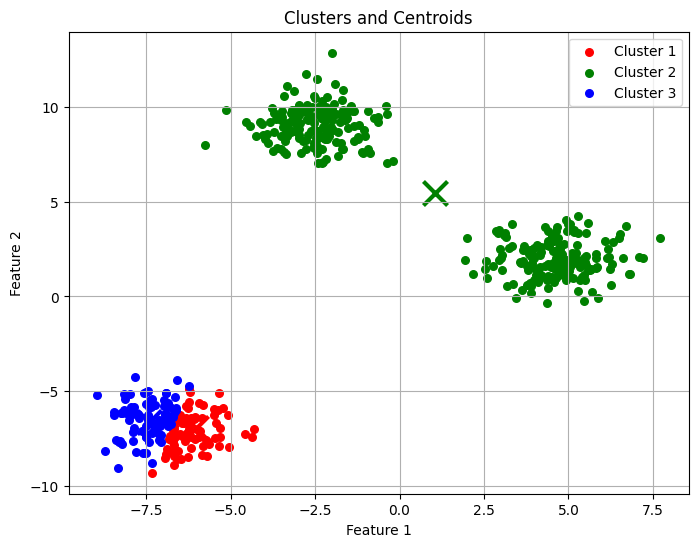

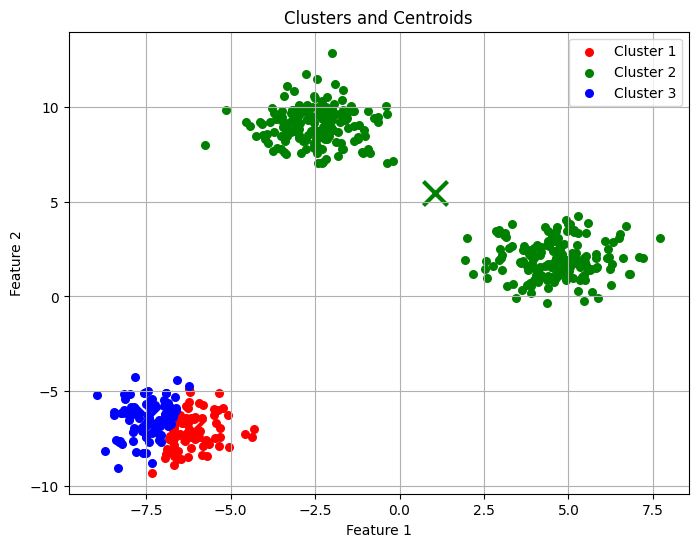

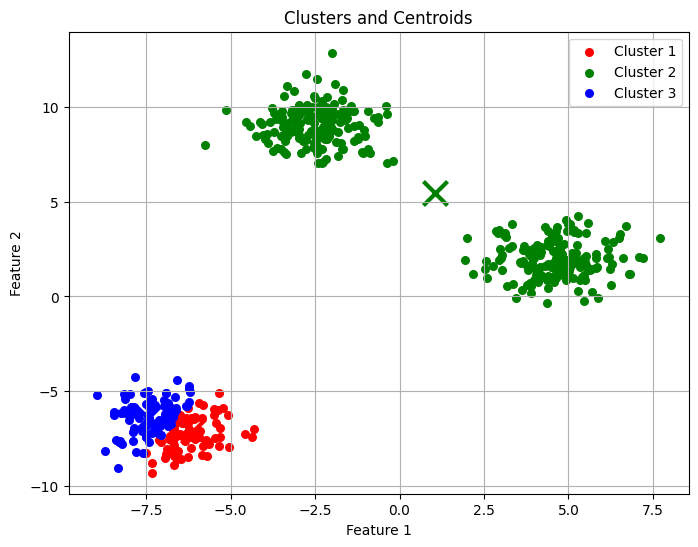

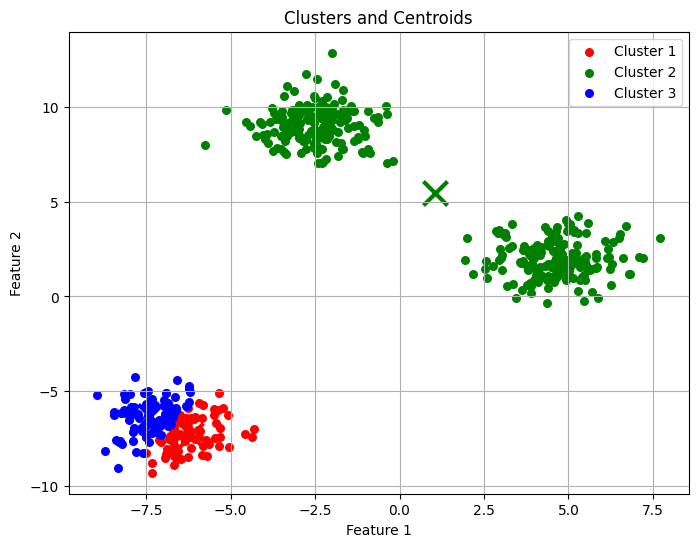

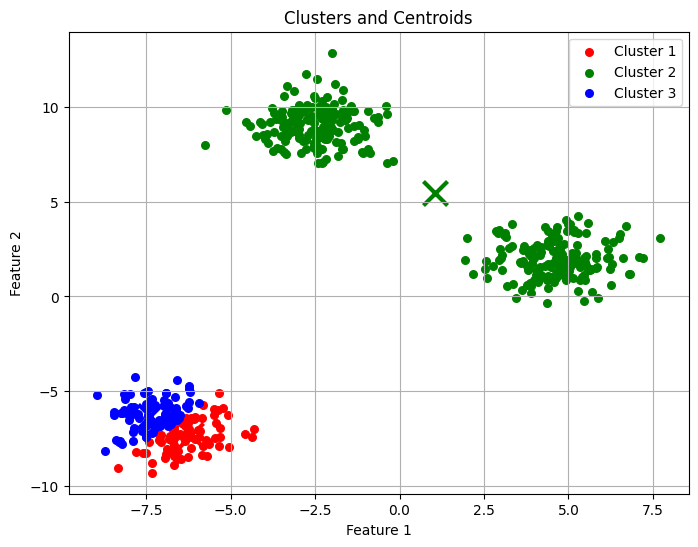

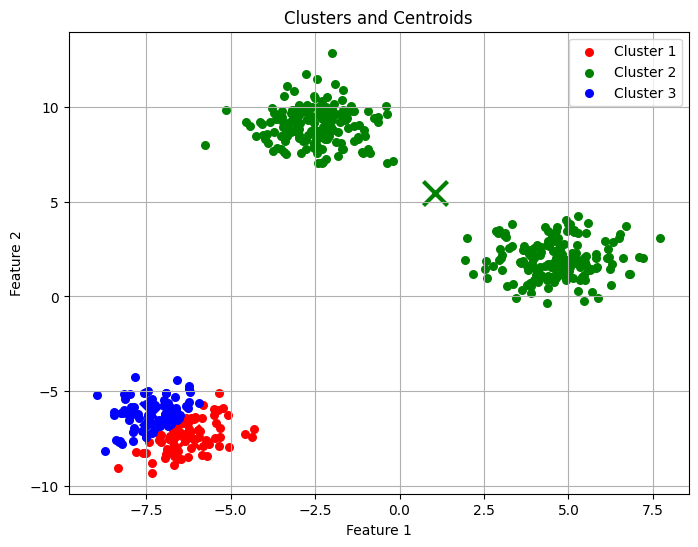

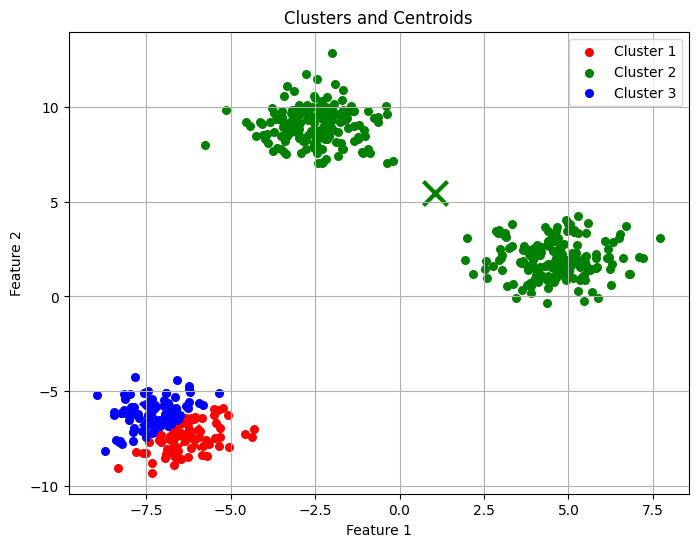

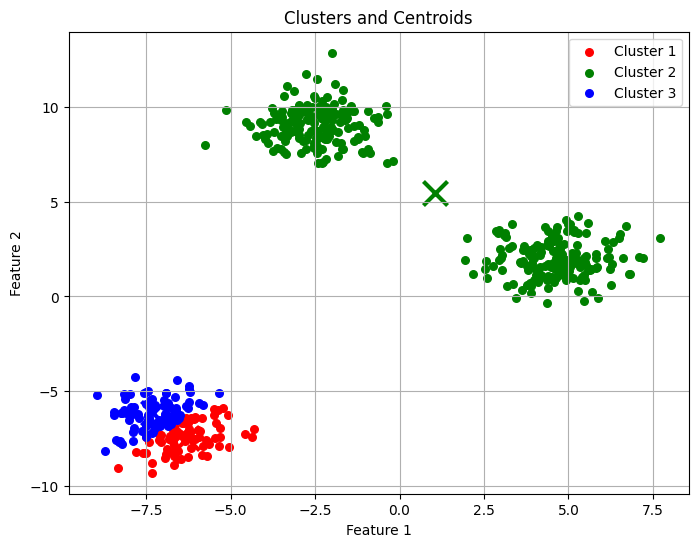

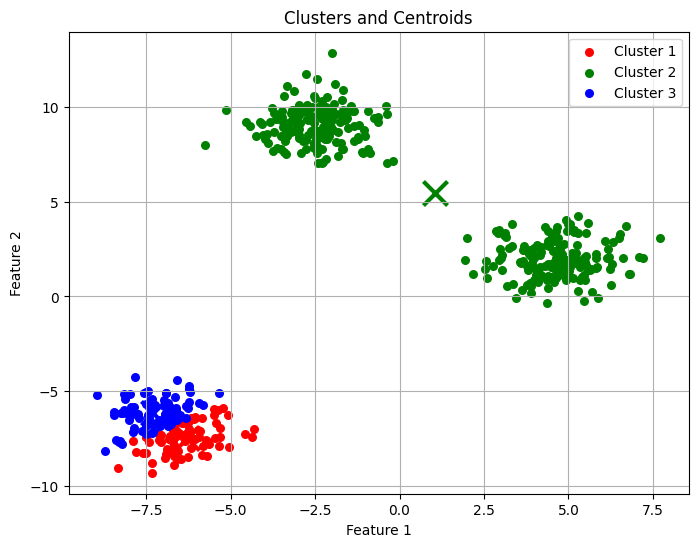

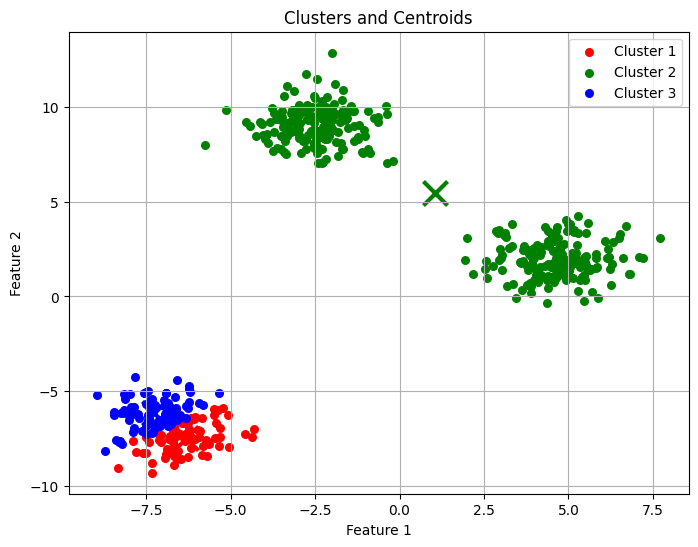

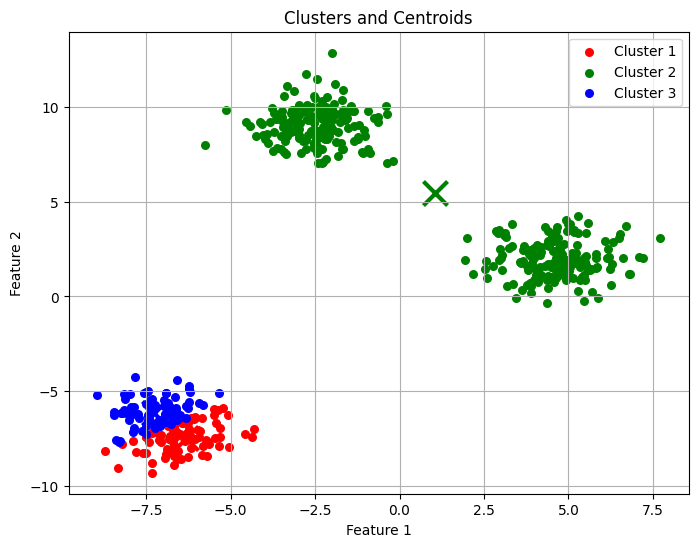

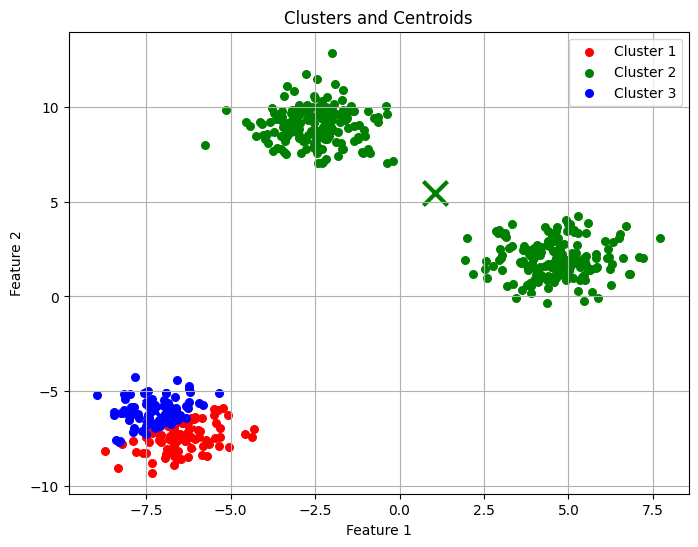

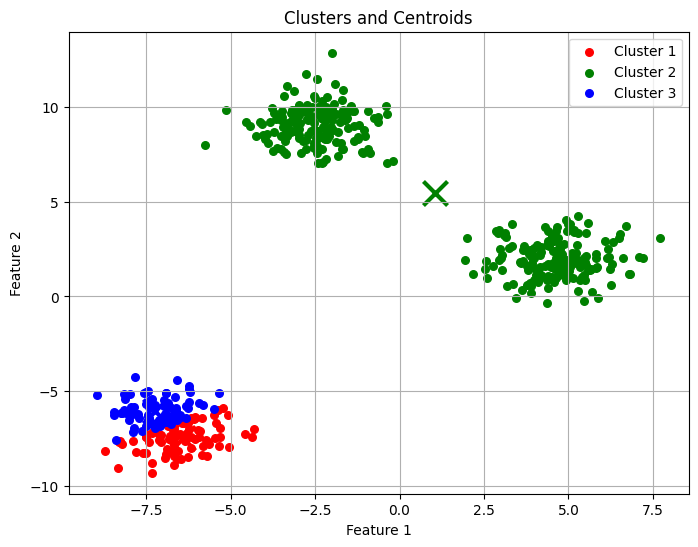

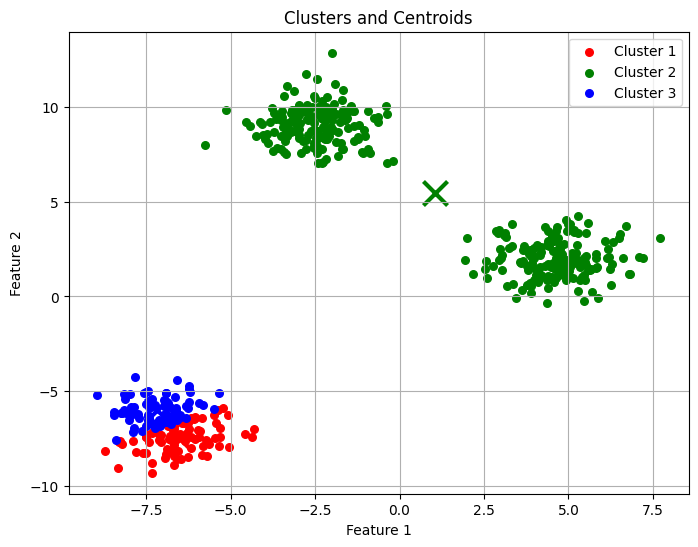

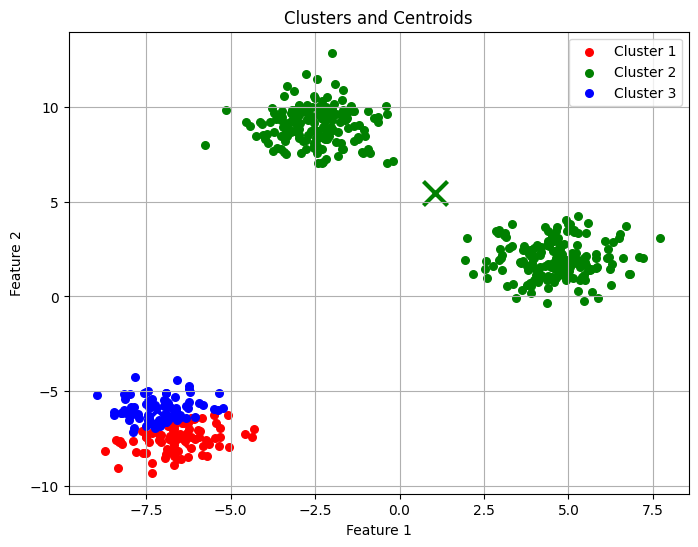

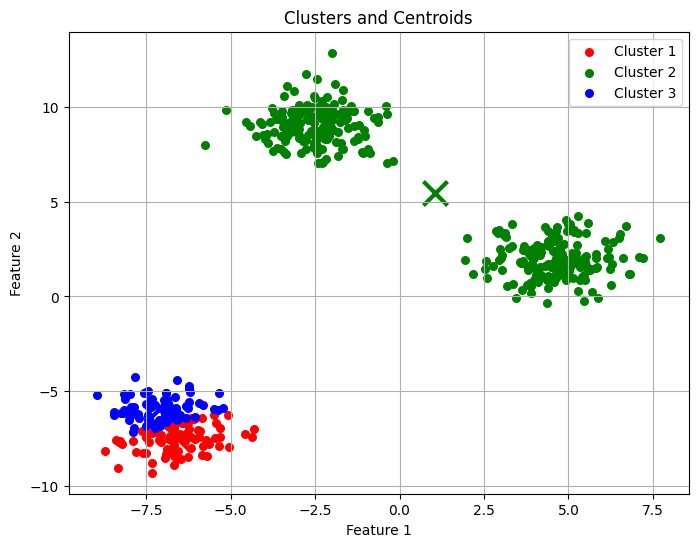

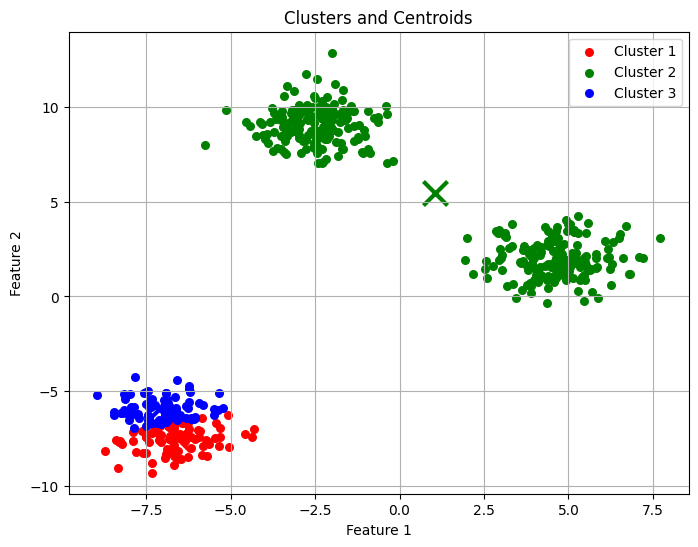

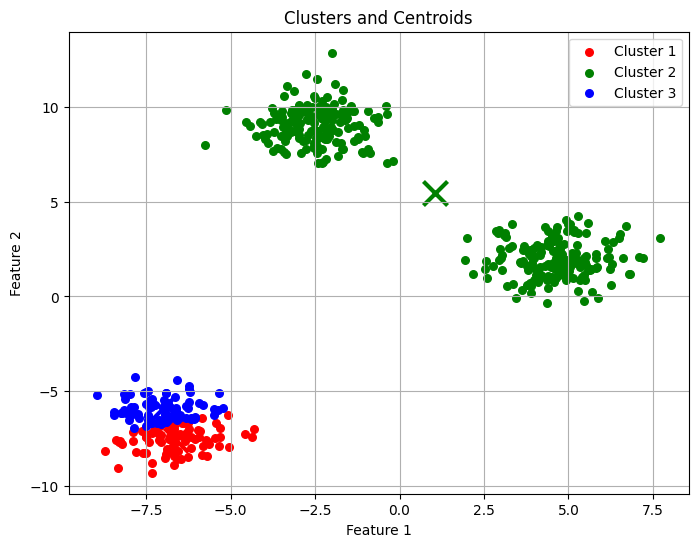

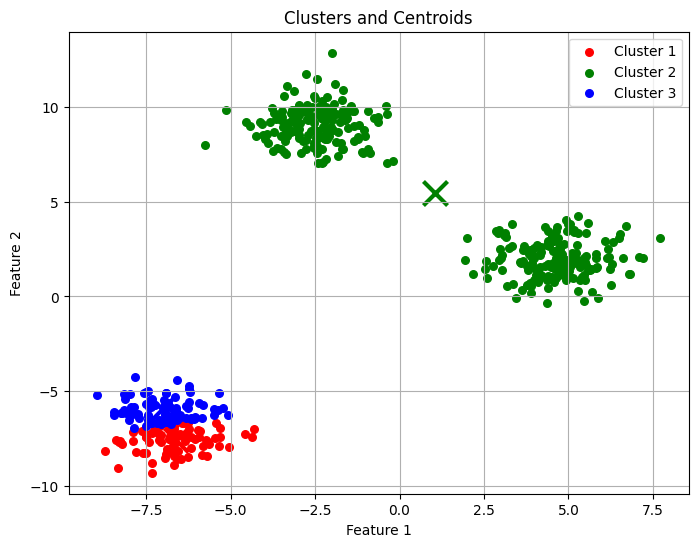

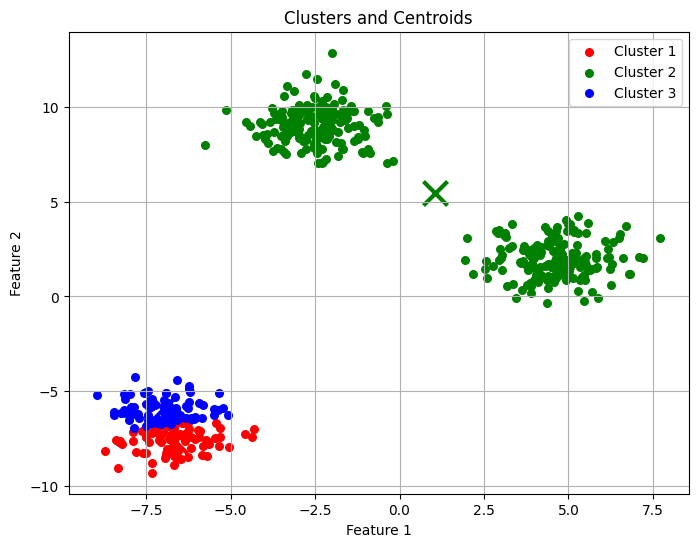

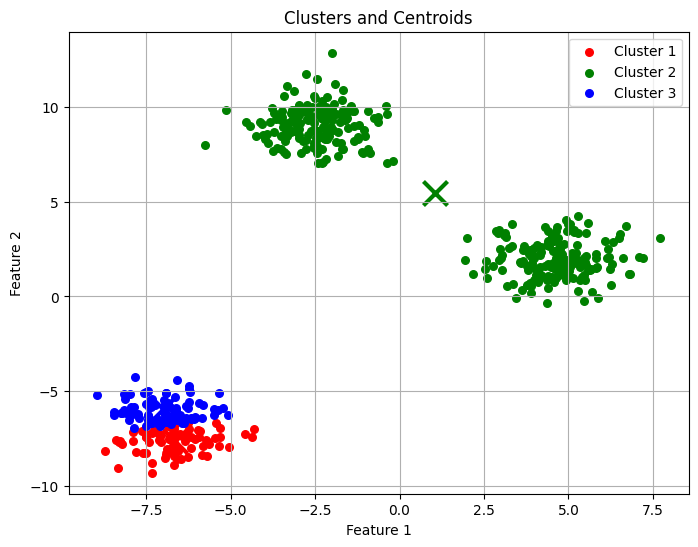

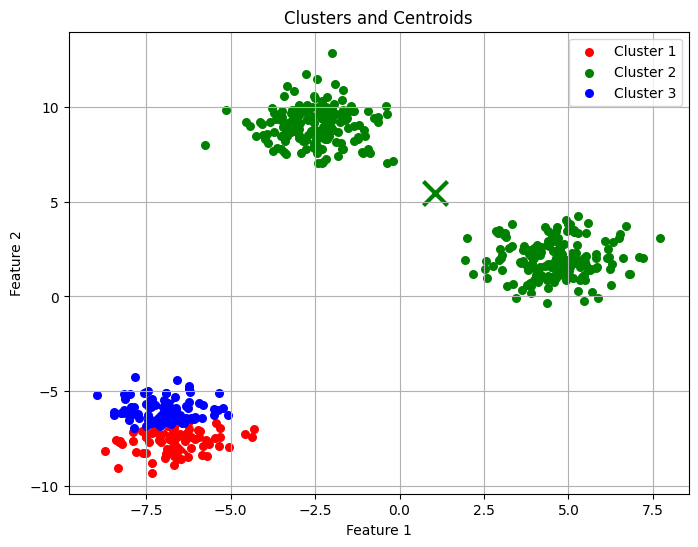

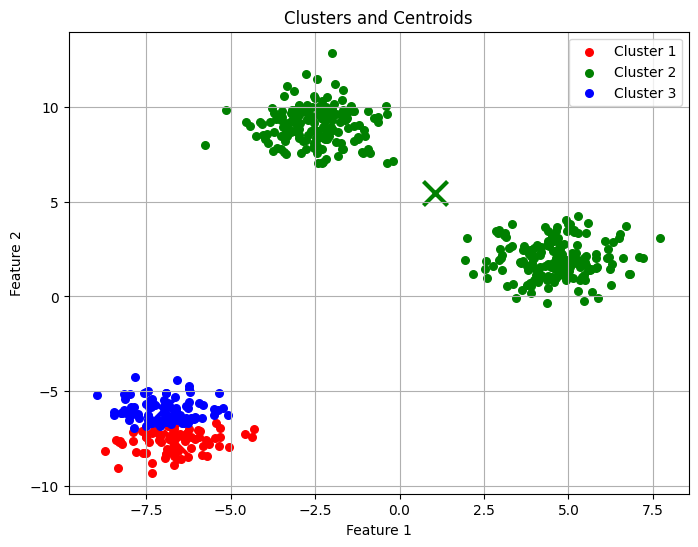

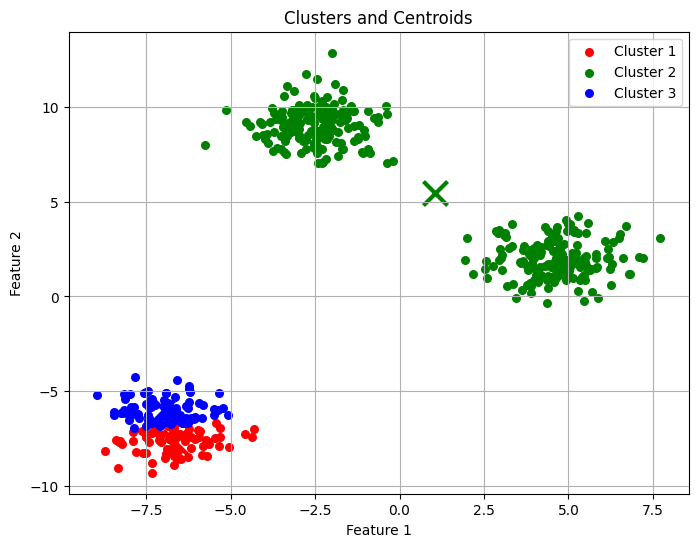

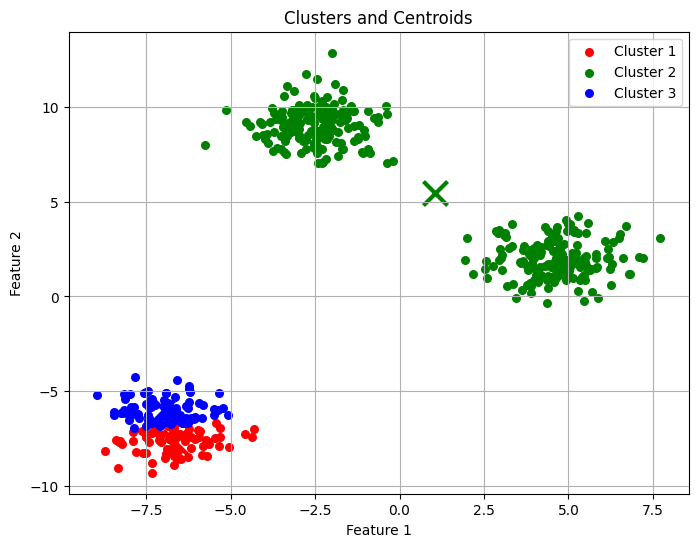

In [354]:
# clusters, centroids = kmeans(X, K=3, max_iters= 200, plot_steps=True)
labels = kmeans(X, K= 3, max_iters=150, plot_steps=True)

### Put it in a class:

In [355]:
class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
      self.K = K
      self.max_iters = max_iters
      self.plot_steps = plot_steps
      self.X = None
      self.centroids = None
      # list of sample indices for each cluster
      self.clusters = None

     # the centers (mean feature vector) for each cluster
      self.mean_cluster = None

    def initialize_centroids(self,X):
      ### add your code here
      idx = np.random.choice(X.shape[0], self.K, replace = False)
      centroids = X[idx]
      return centroids

    def euclidean_distance(self,x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))


    def predict(self, X):
      self.X = X
      ## Initialize the centroids:
      self.centroids = self.initialize_centroids(self.X)

      for _ in range(self.max_iters):

          self.clusters = self._create_clusters(self.centroids)

          if self.plot_steps:
            self.plot()

          centroids_old = self.centroids

          self.centroids = self._get_centroids(self.clusters)

          if self._is_converged(centroids_old) :
              break

          if self.plot_steps:
            self.plot()

      return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):

      n_samples = self.X.shape[0]
      # Create an array to hold the label for each sample
      labels = np.empty(n_samples)
      # Assign each sample the label of the cluster it was assigned to
      for cluster_idx, cluster in enumerate(clusters):
          ### complete the for loop
          for idx  in cluster :

            labels[idx] = cluster_idx

      return labels


    def _create_clusters(self, centroids):
      # Initialize an empty list for each cluster
      clusters = [[] for _ in range(self.K)]

      for idx, sample in enumerate(self.X):
          # Get the index of the closest centroid

          closest_index = self._closest_centroid(sample, centroids)
          # Assign the sample index to the appropriate cluster

          clusters[closest_index].append(idx)

      return clusters


    def _closest_centroid(self, sample, centroids):
      ### add your code here
      distance = []
      # current_centroids =
      for idx in range(centroids.shape[0]):

          dist = euclidean_distance(sample, centroids[idx])

          distance.append(dist)

      closest_index = np.argmin(distance)

      return closest_index



    def _get_centroids(self, clusters):
        n_features = self.X.shape[1]
        # Initialize the centroids array
        centroids = np.zeros((len(clusters), n_features))
        for cluster_idx, cluster in enumerate(clusters):
            # Ensure the cluster is not empty
            if len(cluster) > 0:
                # Calculate the mean for the cluster

                self.mean_cluster = np.mean(X[cluster], axis = 0)
                # Assign the new centroid

                centroids[cluster_idx] = self.mean_cluster
            # Handling empty clusters if necessary
            else:
                # Assign a random data point as a new centroid
                centroids[cluster_idx] = self.X[np.random.choice(len(self.X))]
        return centroids

    def _is_converged(self, centroids_old):
        ### add your code here
        distances = np.zeros(self.centroids.shape[0])

        for idx in range(distances.shape[0]):

          distances[idx] = self.euclidean_distance(centroids_old[idx], self.centroids[idx])

        return np.sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point, label = f"Cluster {i+1}")

        for point in self.centroids:
            ax.scatter(*point, marker="*", color = 'black', linewidth=2)

        plt.legend()
        plt.show()

In [356]:
X, y = make_blobs(centers= 3 , n_samples= 500 , n_features= 2, shuffle= True , random_state= 42)

In [357]:
clusters = len(np.unique(y))

In [358]:
k = KMeans(K = clusters, max_iters = 150, plot_steps = True)

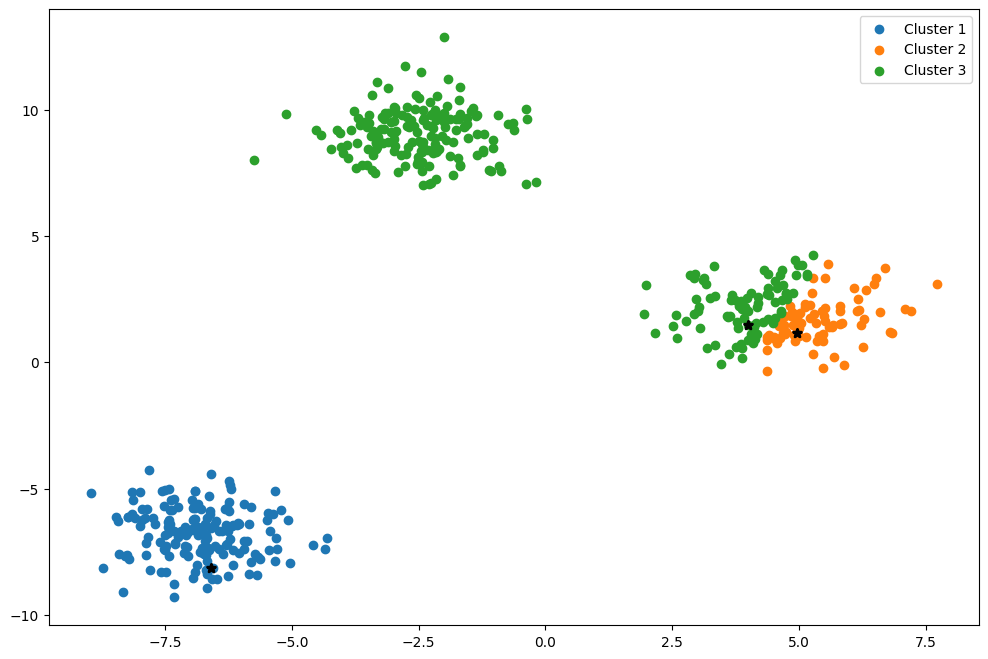

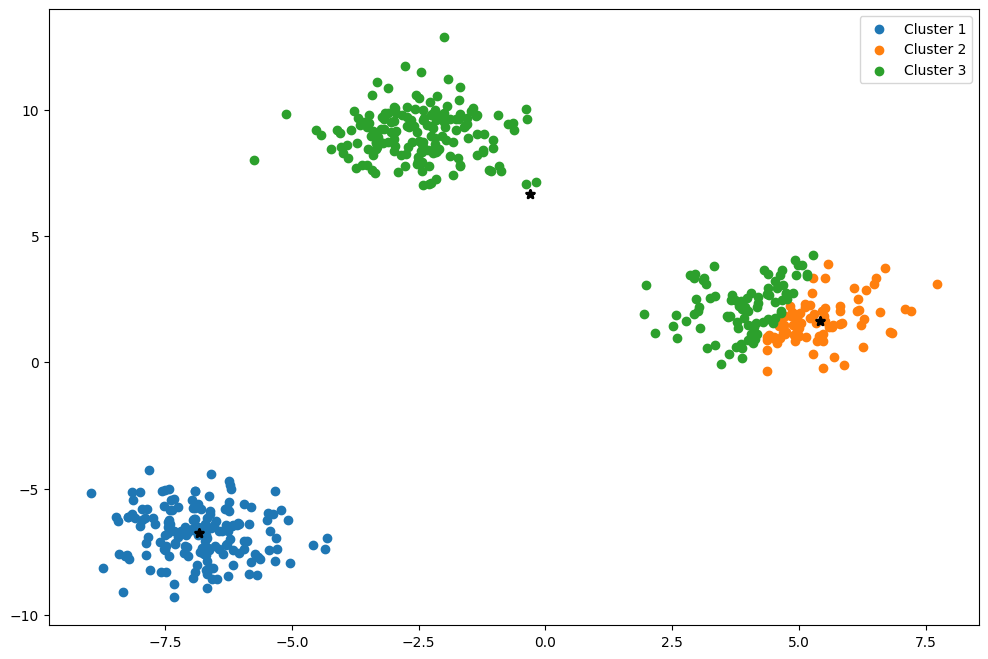

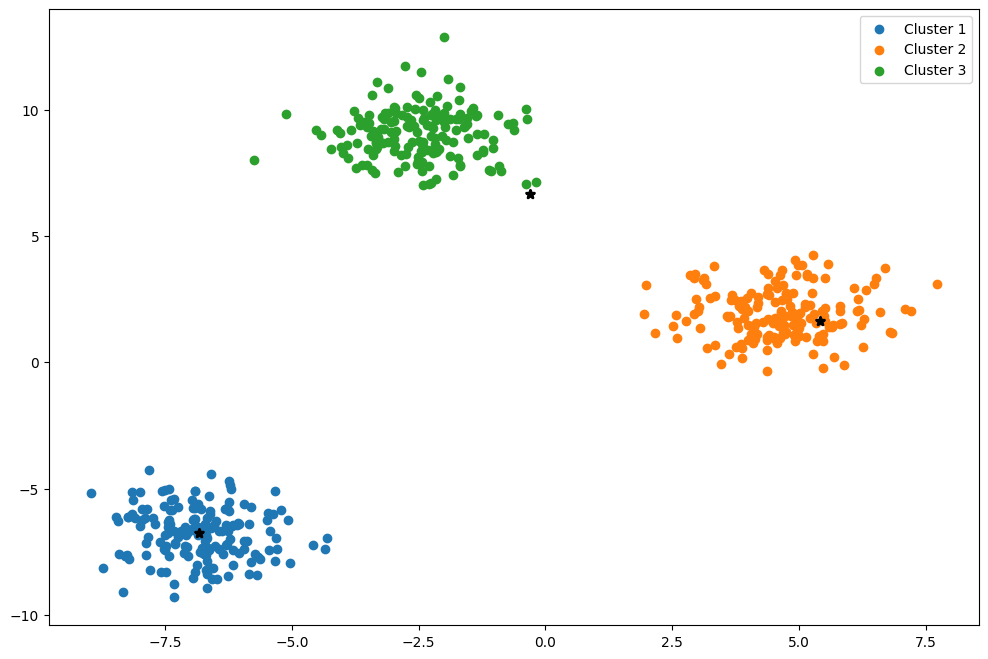

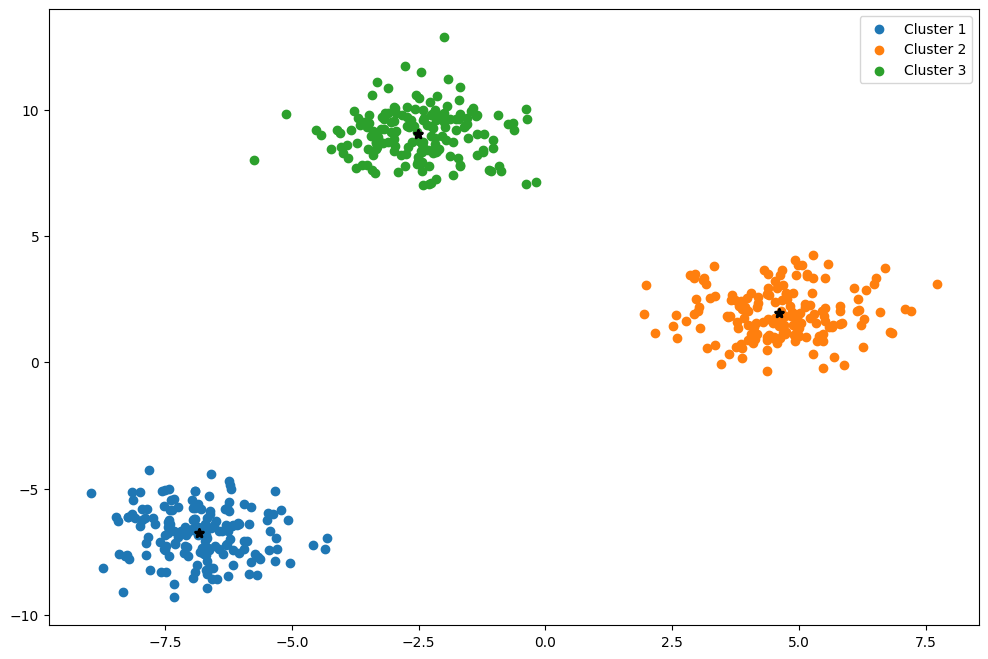

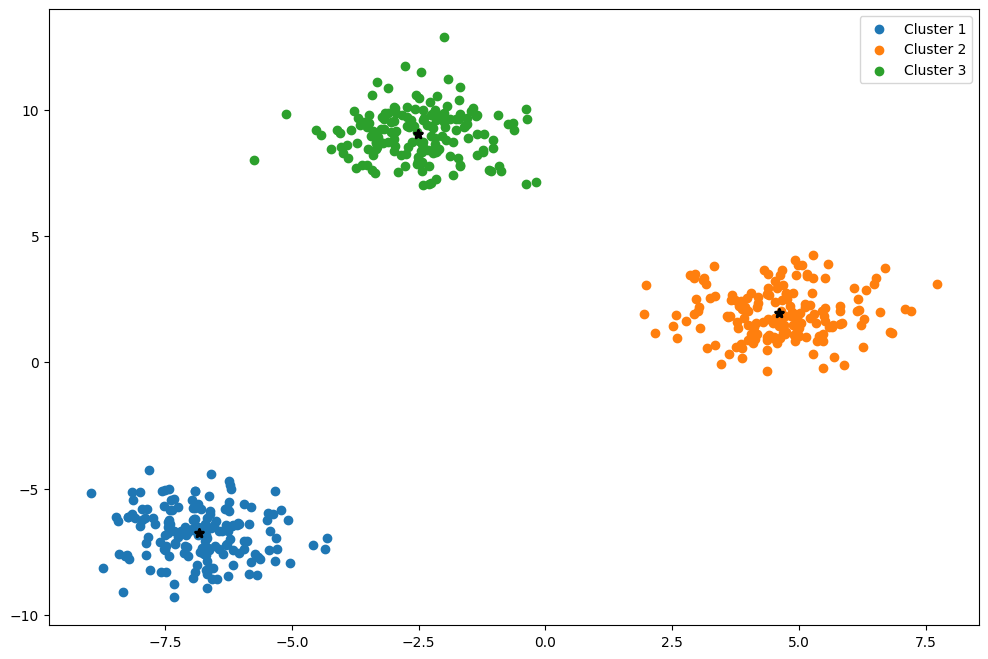

In [359]:
y_pred = k.predict(X)